Radial Velocity Offsets (rv_offset)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
b.add_dataset('rv', times=np.linspace(0,1,101), dataset='rv01')

<ParameterSet: 76 parameters | contexts: dataset, compute, constraint, figure>

In [4]:
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])
b.set_value_all('atm', 'blackbody')

Relevant Parameters
--------------------

Radial velocity offsets allow for a per-component and per-dataset offset applied to the synthetic RVs.

First let's run a model without any offsets applied.

In [5]:
b.run_compute(model='without_offset')

100%|██████████| 101/101 [00:01<00:00, 88.79it/s]


<ParameterSet: 5 parameters | components: secondary, primary>

and now let's look at the `rv_offset` parameters and set an offset for the primary RV.

In [6]:
print(b.filter(qualifier='rv_offset'))

ParameterSet: 2 parameters
   rv_offset@primary@rv01@dataset: 0.0 km / s
   rv_offset@secondary@rv01@da...: 0.0 km / s


In [7]:
b.set_value(qualifier='rv_offset', component='primary', value=25)

Now let's run another model, with the offset applied to the primary component.

In [8]:
b.run_compute(model='with_offset')

100%|██████████| 101/101 [00:01<00:00, 84.15it/s]


<ParameterSet: 5 parameters | components: secondary, primary>

Influence on Radial Velocities
------------------

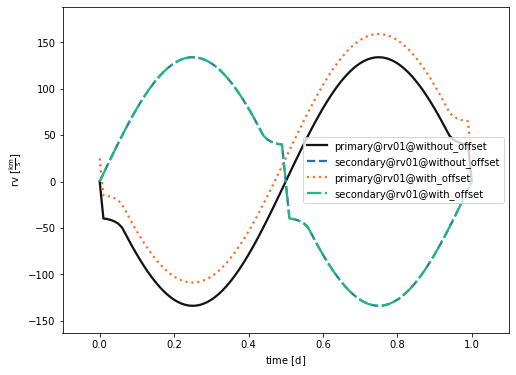

In [9]:
afig, mplfig = b.plot(legend=True, show=True)

Here we see the constant rv_offset applied to the synthetic RVs for the primary star.